In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Phishing/PhishTank/Base_classifier_result(pre HTML cross)(3).csv")
data

,labels,mlp_prediction_non,mlp_prediction_phish,nn_prediction_non,nn_prediction_phish,nn2_prediction_non,nn2_prediction_phish
0,0,0.999999,6.257599e-07,0.999999,6.257599e-07,0.999999,6.257599e-07
1,0,0.602153,3.978466e-01,0.602153,3.978466e-01,0.602153,3.978466e-01
2,1,0.966003,3.399745e-02,0.966003,3.399745e-02,0.966003,3.399745e-02
3,1,0.580367,4.196330e-01,0.580367,4.196330e-01,0.580367,4.196330e-01
4,1,0.113440,8.865602e-01,0.113440,8.865602e-01,0.113440,8.865602e-01
...,...,...,...,...,...,...,...
4647,1,0.075658,9.243419e-01,0.075658,9.243419e-01,0.075658,9.243419e-01
4648,0,1.000000,9.731610e-27,1.000000,9.731610e-27,1.000000,9.731610e-27
4649,0,1.000000,9.167162e-28,1.000000,9.167162e-28,1.000000,9.167162e-28
4650,0,1.000000,2.659416e-09,1.000000,2.659416e-09,1.000000,2.659416e-09


In [4]:
data.shape

(4652, 7)

In [5]:
data.columns

Index(['labels', 'mlp_prediction_non', 'mlp_prediction_phish',
       'nn_prediction_non', 'nn_prediction_phish', 'nn2_prediction_non',
       'nn2_prediction_phish'],
      dtype='object')

In [6]:
data.describe()

,labels,mlp_prediction_non,mlp_prediction_phish,nn_prediction_non,nn_prediction_phish,nn2_prediction_non,nn2_prediction_phish
count,4652.000000,4652.000000,4.652000e+03,4652.000000,4.652000e+03,4652.000000,4.652000e+03
mean,0.434652,0.656800,3.431997e-01,0.656800,3.431997e-01,0.656800,3.431997e-01
std,0.495765,0.405590,4.055901e-01,0.405590,4.055901e-01,0.405590,4.055901e-01
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,0.000000,0.132368,5.043148e-27,0.132368,5.043148e-27,0.132368,5.043148e-27
50%,0.000000,0.998503,1.497032e-03,0.998503,1.497032e-03,0.998503,1.497032e-03
75%,1.000000,1.000000,8.676316e-01,1.000000,8.676316e-01,1.000000,8.676316e-01
max,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00


In [7]:
import numpy as np


y = data['labels'].values
x = np.array(data.drop('labels',axis=1))


print(x.shape, y.shape)

(4652, 6) (4652,)


In [8]:

import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


def model_aa(x_train, x_val, y_train, y_val, opt, early_stopping_monitor):

  n_cols = x_train.shape[1]
  # print("check point")
  #create model
  model = Sequential()
  model.add(Dense(30, activation='relu', input_shape=(n_cols,)))
  model.add(Dense(10, activation='relu'))

  model.add(Dense(1, activation = 'sigmoid'))
  # softmax
  #compile model using mse as a measure of model performance
  model.compile(optimizer = opt, loss= 'binary_crossentropy', metrics=["accuracy"])

  history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping_monitor])


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
  plt.show()


  print('Validation Accuracy: ')
  # Predicting the Test set results
  y_pred = model.predict(x_val)
  y_pred = (y_pred > 0.5)


  print(classification_report(y_val, y_pred))

  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

  # Creating the Confusion Matrix
  cm = confusion_matrix(y_val, y_pred)
  print(cm)
  print('Precision: %.4f' % precision_score(y_val, y_pred))
  print('Recall: %.4f' % recall_score(y_val, y_pred))
  print('F1 Score: %.4f' % f1_score(y_val, y_pred))
  return metrics.accuracy_score(y_val, y_pred)



Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.6666 - accuracy: 0.6034 - val_loss: 0.5572 - val_accuracy: 0.7382
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.5093 - accuracy: 0.7814 - val_loss: 0.5179 - val_accuracy: 0.7747
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.7986 - val_loss: 0.5138 - val_accuracy: 0.7682
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.7907 - val_loss: 0.5135 - val_accuracy: 0.7682
Epoch 5/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.7903 - val_loss: 0.5112 - val_accuracy: 0.7661
Epoch 6/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4824 - accuracy: 0.7883 - val_loss: 0.5100 - val_accuracy: 0.7639
Epoch 7/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4822 - accuracy: 0.7867 - val_loss: 0.5107 - val_accuracy: 0.7682

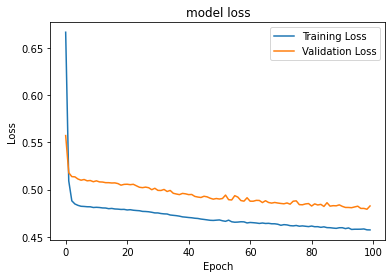

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       260
           1       0.78      0.72      0.75       206

    accuracy                           0.79       466
   macro avg       0.78      0.78      0.78       466
weighted avg       0.79      0.79      0.78       466

Accuracy: 0.7854077253218884
[[218  42]
 [ 58 148]]
Precision: 0.7789
Recall: 0.7184
F1 Score: 0.7475
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.5316 - accuracy: 0.7618 - val_loss: 0.4724 - val_accuracy: 0.8026
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4913 - accuracy: 0.7881 - val_loss: 0.4698 - val_accuracy: 0.7854
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.7881 - val_loss: 0.4703 - val_accuracy: 0.7897
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.7814 - val_loss: 0.4686 

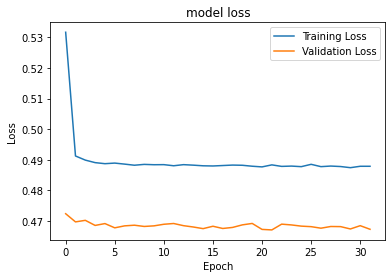

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       252
           1       0.84      0.68      0.75       214

    accuracy                           0.80       466
   macro avg       0.81      0.79      0.79       466
weighted avg       0.80      0.80      0.79       466

Accuracy: 0.796137339055794
[[225  27]
 [ 68 146]]
Precision: 0.8439
Recall: 0.6822
F1 Score: 0.7545
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.5335 - accuracy: 0.7679 - val_loss: 0.4924 - val_accuracy: 0.7828
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4913 - accuracy: 0.7798 - val_loss: 0.4896 - val_accuracy: 0.7720
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4898 - accuracy: 0.7829 - val_loss: 0.4857 - val_accuracy: 0.7914
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.7944 - val_loss: 0.4862 -

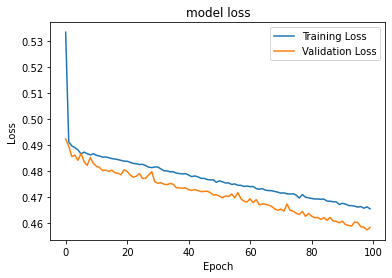

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       252
           1       0.83      0.76      0.79       213

    accuracy                           0.82       465
   macro avg       0.82      0.81      0.81       465
weighted avg       0.82      0.82      0.81       465

Accuracy: 0.8150537634408602
[[218  34]
 [ 52 161]]
Precision: 0.8256
Recall: 0.7559
F1 Score: 0.7892
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.5259 - accuracy: 0.7724 - val_loss: 0.4824 - val_accuracy: 0.7957
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.7903 - val_loss: 0.4821 - val_accuracy: 0.7935
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.7898 - val_loss: 0.4810 - val_accuracy: 0.8000
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.7882 - val_loss: 0.4808 

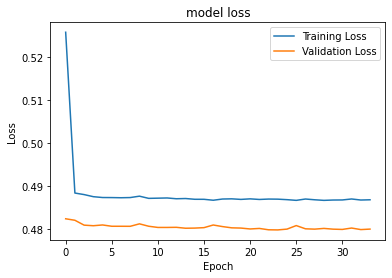

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       275
           1       0.83      0.64      0.72       190

    accuracy                           0.80       465
   macro avg       0.81      0.77      0.78       465
weighted avg       0.80      0.80      0.79       465

Accuracy: 0.8
[[251  24]
 [ 69 121]]
Precision: 0.8345
Recall: 0.6368
F1 Score: 0.7224
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.5277 - accuracy: 0.7707 - val_loss: 0.5094 - val_accuracy: 0.7849
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4888 - accuracy: 0.7908 - val_loss: 0.5087 - val_accuracy: 0.7505
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4871 - accuracy: 0.7922 - val_loss: 0.5072 - val_accuracy: 0.7849
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4857 - accuracy: 0.7893 - val_loss: 0.5081 - val_accuracy:

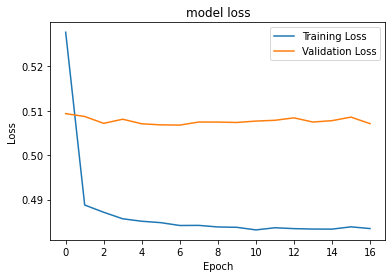

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.75      0.92      0.82       267
           1       0.84      0.59      0.69       198

    accuracy                           0.78       465
   macro avg       0.79      0.75      0.76       465
weighted avg       0.79      0.78      0.77       465

Accuracy: 0.7763440860215054
[[245  22]
 [ 82 116]]
Precision: 0.8406
Recall: 0.5859
F1 Score: 0.6905
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.5344 - accuracy: 0.7671 - val_loss: 0.4369 - val_accuracy: 0.8237
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4994 - accuracy: 0.7891 - val_loss: 0.4202 - val_accuracy: 0.8430
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4968 - accuracy: 0.7846 - val_loss: 0.4213 - val_accuracy: 0.8430
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4952 - accuracy: 0.7858 - val_loss: 0.4183 

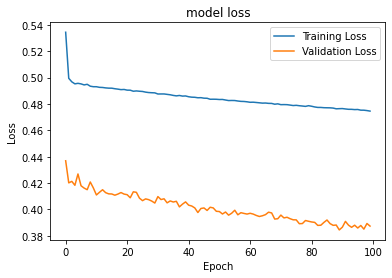

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       282
           1       0.89      0.74      0.81       183

    accuracy                           0.86       465
   macro avg       0.87      0.84      0.85       465
weighted avg       0.86      0.86      0.86       465

Accuracy: 0.8602150537634409
[[265  17]
 [ 48 135]]
Precision: 0.8882
Recall: 0.7377
F1 Score: 0.8060
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.5085 - accuracy: 0.7817 - val_loss: 0.5207 - val_accuracy: 0.7634
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4858 - accuracy: 0.7920 - val_loss: 0.5299 - val_accuracy: 0.7634
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.7903 - val_loss: 0.5263 - val_accuracy: 0.7527
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4839 - accuracy: 0.7872 - val_loss: 0.5214 

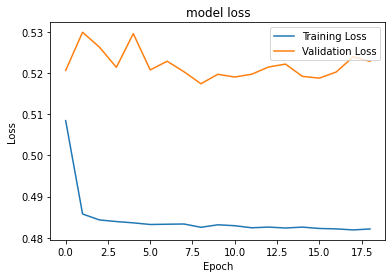

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       251
           1       0.89      0.58      0.71       214

    accuracy                           0.78       465
   macro avg       0.81      0.76      0.76       465
weighted avg       0.80      0.78      0.77       465

Accuracy: 0.7763440860215054
[[236  15]
 [ 89 125]]
Precision: 0.8929
Recall: 0.5841
F1 Score: 0.7062
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.5072 - accuracy: 0.7748 - val_loss: 0.4835 - val_accuracy: 0.7849
Epoch 2/100
131/131 [==============================] - 0s 3ms/step - loss: 0.4869 - accuracy: 0.7908 - val_loss: 0.4829 - val_accuracy: 0.7871
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4862 - accuracy: 0.7886 - val_loss: 0.4831 - val_accuracy: 0.7871
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4867 - accuracy: 0.7908 - val_loss: 0.4825 

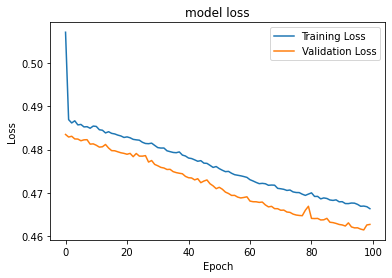

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       268
           1       0.81      0.66      0.73       197

    accuracy                           0.79       465
   macro avg       0.80      0.77      0.78       465
weighted avg       0.79      0.79      0.79       465

Accuracy: 0.7913978494623656
[[238  30]
 [ 67 130]]
Precision: 0.8125
Recall: 0.6599
F1 Score: 0.7283
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.5234 - accuracy: 0.7521 - val_loss: 0.5215 - val_accuracy: 0.7699
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.7922 - val_loss: 0.5207 - val_accuracy: 0.7677
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4832 - accuracy: 0.7925 - val_loss: 0.5221 - val_accuracy: 0.7656
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.7901 - val_loss: 0.5211 

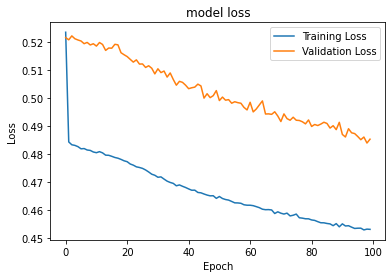

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       265
           1       0.78      0.68      0.73       200

    accuracy                           0.78       465
   macro avg       0.78      0.77      0.77       465
weighted avg       0.78      0.78      0.78       465

Accuracy: 0.7806451612903226
[[228  37]
 [ 65 135]]
Precision: 0.7849
Recall: 0.6750
F1 Score: 0.7258
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.5163 - accuracy: 0.7726 - val_loss: 0.4812 - val_accuracy: 0.8000
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.7889 - val_loss: 0.4798 - val_accuracy: 0.7914
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4871 - accuracy: 0.7886 - val_loss: 0.4799 - val_accuracy: 0.7892
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.7850 - val_loss: 0.4772 

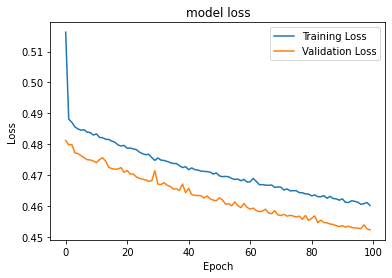

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       258
           1       0.83      0.70      0.76       207

    accuracy                           0.80       465
   macro avg       0.81      0.79      0.80       465
weighted avg       0.81      0.80      0.80       465

Accuracy: 0.8021505376344086
[[228  30]
 [ 62 145]]
Precision: 0.8286
Recall: 0.7005
F1 Score: 0.7592
Average Validation Accuracy: 0.798369560201209


In [9]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)


from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0
kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x, y):
  val_acc = model_aa(x[train], x[val], y[train], y[val], optimizer1, early_stopping_monitor)
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)

